# TASK 1 - Prediction using Supervised ML
To Predict the percentage of marks of the students based on the number of hours they studied.

In [48]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [49]:
#Reading & Exploring Data
Data = pd.read_csv('http://bit.ly/w-data')

print(Data.head(10))
print(Data.info())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


There is no null value in the Dataset so, we can now visualize our Data.

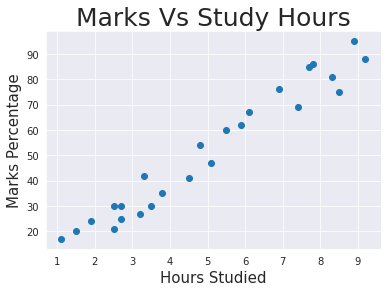

In [50]:
# Data Visualization
plt.scatter(Data['Hours'], Data['Scores'])
plt.title('Marks Vs Study Hours',size=25)
plt.xlabel('Hours Studied', size=15)
plt.ylabel('Marks Percentage', size=15)
plt.show()

From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied',

Lets plot a regression line to confirm the correlation.

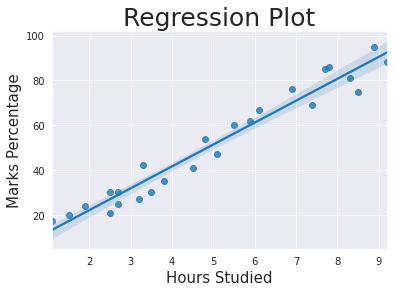

In [51]:
# Regression Plot
import seaborn as sns
sns.set_style('darkgrid')
sns.regplot(x=Data['Hours'], y=Data['Scores'])

plt.title('Regression Plot',size=25)
plt.xlabel('Hours Studied', size=15)
plt.ylabel('Marks Percentage', size=15)
plt.show()

In [52]:
print(Data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


### Training the Model

1) Splitting the Data

In [83]:
# Defining X and Y from the Data
#X = Data['Hours'].values
#Y = Data['Scores'].values
X = Data.iloc[:, :-1].values
y = Data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

2) Fitting the Data into the model

In [85]:
# Fitting the Data
Reg = LinearRegression().fit(train_X, train_y)

Now our Model was Trained

### Predicting the Percentage of Marks

In [92]:
# Predict the Marks
pred_y = Reg.predict(val_X)

# DF of Predicted Marks
Predicted_Marks = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})

print(Predicted_Marks)

   Hours  Predicted Marks
0    1.5        16.844722
1    3.2        33.745575
2    7.4        75.500624
3    2.5        26.786400
4    5.9        60.588106
5    3.8        39.710582
6    1.9        20.821393


### Comparing the Predicted Marks with the Actual Marks.

In [93]:
# Compare the Scores
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
print(compare_scores)

   Actual Marks  Predicted Marks
0            20        16.844722
1            27        33.745575
2            69        75.500624
3            30        26.786400
4            62        60.588106
5            35        39.710582
6            24        20.821393


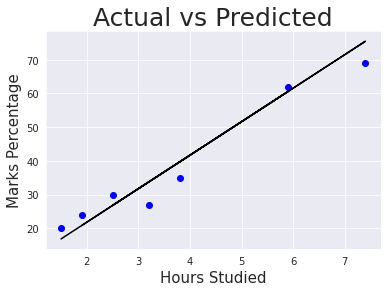

In [96]:
# Visually Comparing the Predicted Marks with the Actual Marks
plt.scatter(val_X, val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=25)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

### Evaluating the Model.

In [98]:
# Calculating the accuracy of the model
print('Mean Absolute Error:',mean_absolute_error(val_y,pred_y))

Mean Absolute Error: 4.130879918502482


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [100]:
Rredicted_Score = Reg.predict([[9.25]])
print("Score = {}".format(round(Rredicted_Score[0],3)))

Score = 93.893


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.